# Code to measure the offset of each MIRI galaxy to the centre of the frame

To do this, we will read in the catalogue of galaxies to obtain their respective IDs, RAs and Decs. Then we will fit a centroid to all our MIRI images and determine their coordinates. From this we can calculate the spherical offsets. Lastly we will plot the results and see what happens.

In [67]:
from astropy.io import fits
from astropy import table
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
from astropy.nddata import Cutout2D
from photutils import centroids
import scipy
import os
import glob
import pandas as pd

Load the necessary data files

In [68]:
# Load target catalogue
with fits.open('./cat_targets.fits') as cat_hdul:
    #cat_hdul.info()
    cat_data = cat_hdul[1].data  # Extract data from table
    cat_header = cat_hdul[1].header
    ids = cat_data['id']
    ra = cat_data['ra']
    dec = cat_data['dec']

cat = table.Table.read('./cat_targets.fits', 1)

df = pd.DataFrame(cat_data)

# Adjust pandas display settings
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_colwidth", None)  # Prevent text truncation
print(df)

# add columns to store the astrometric offset for PRIMER and COSMOS-Web
cat['primer_dra'] = 0.0*u.arcsec
cat['primer_ddec'] = 0.0*u.arcsec
cat['cweb_dra'] = 0.0*u.arcsec
cat['cweb_ddec'] = 0.0*u.arcsec
print(cat.columns)

# Specify the path to the cutouts directory
my_cutouts = '/home/bpc/University/master/Red_Cardinal/cutouts/'

# Load the PRIMER cutouts
primer_cutouts = glob.glob(os.path.join(my_cutouts, "*primer.fits"))
print(f"Found {len(primer_cutouts)} FITS files for the PRIMER survey.")

# Load the COSMOS-Web cutouts
cweb_cutouts = glob.glob(os.path.join(my_cutouts, "*cweb.fits"))
print(f"Found {len(cweb_cutouts)} FITS files for the COSMOS-Web survey.")

cat


        id          ra       dec  mag_F160W   SNR_F160W  completeness_F160W  \
0    16419  150.095610  2.350069  21.092845   40.885956            1.000000   
1    16424  150.110158  2.346670  23.942241   10.464218            1.000000   
2    16474  150.113438  2.347475  23.549207   37.372143            1.000000   
3    16516  150.115338  2.347699  24.736447   15.323874            1.000000   
4    16615  150.103726  2.348593  25.266127   10.506152            0.901972   
5    16874  150.098291  2.351572  22.927171   38.400112            1.000000   
6    17000  150.115551  2.353707  22.751866   19.388833            1.000000   
7    17517  150.094463  2.358221  23.049673   27.181413            1.000000   
8    17534  150.096726  2.357717  24.950932    8.228598            0.974432   
9    17555  150.134684  2.357977  24.651441   12.146364            1.000000   
10   17669  150.094934  2.359268  23.914853   18.317563            1.000000   
11   17713  150.129011  2.359795  23.876192   33.177

id,ra,dec,mag_F160W,SNR_F160W,completeness_F160W,use_phot,label,stellarity,UV,VJ,z_best,z_best_source,z_peak_phot,R50,lmass,emul_lmass,emul_zred,NRS_CLEAR,NRS_F110W,NRS_F140X,weight,REFERENCE,primer_dra,primer_ddec,cweb_dra,cweb_ddec
,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,arcsec
int64,float64,float64,float64,float64,float64,int64,bytes4,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
16419,150.09560987849449,2.350068700469065,21.092844821334502,40.88595576743161,1.0,1,QSC,0,1.5600931447462194,0.9589469782630602,2.0868,3,2.0868,0.949068,11.29,11.462091290524182,2.102192906583932,22.250194448032374,21.5263829151584,20.86525345573673,53,0,0.0,0.0,0.0,0.0
16424,150.1101583934326,2.346669586114658,23.942241003234503,10.46421842226883,1.0,1,SF,0,0.9125312467430944,0.6995908342588574,0.4599,3,0.4599,0.764112,8.21,10.227400611555714,3.390518408445281,24.060133431399283,23.752517940131952,23.231808259805344,17,0,0.0,0.0,0.0,0.0
16474,150.11343833916197,2.3474745865071815,23.54920722966591,37.37214282206178,1.0,1,SF,0,0.41661710299546073,0.4586217877716759,2.8586,3,2.8586,0.188208,9.92,9.837901983027878,2.5244138771141094,29.94853130520459,28.989472895164567,26.399979067336737,3,0,0.0,0.0,0.0,0.0
16516,150.11533773478388,2.347698518052218,24.73644681741458,15.323874182904985,1.0,1,SF,0,0.956183089633238,0.5004374707212188,2.7193,3,2.7193,0.165294,9.72,9.835761227538331,2.728772481361164,25.978525777091853,25.275390491935315,24.779989106207516,3,1,0.0,0.0,0.0,0.0
16615,150.1037259277942,2.3485930147531473,25.266127222673877,10.506151860996347,0.9019715294903794,1,SF,0,0.5989253117247633,0.4559327905886963,2.1453,3,2.1453,0.41592,9.03,9.208214679793297,2.196671026524702,30.13508170545995,29.944658078618712,30.022548784153813,2,0,0.0,0.0,0.0,0.0
16874,150.09829123652534,2.3515716804864133,22.927171409180353,38.40011154680128,1.0,1,SF,0,0.9354502102606164,0.93082687649012,2.14559,2,2.1334,0.414534,10.46,10.447347060820114,2.1962415580994485,23.689105060053784,23.22689486541541,22.643152276805036,12,0,0.0,0.0,0.0,0.0
17000,150.11555120295176,2.3537070009366734,22.751865637630367,19.38883319477725,1.0,1,SF,0,0.7284146509415536,0.8099026649201231,3.3209,3,3.3209,0.691764,11.17,11.171878404405147,3.145280428133369,23.171728788303575,22.572846513906022,21.948568695022033,71,0,0.0,0.0,0.0,0.0
17517,150.09446324616317,2.3582214366916006,23.049672623837328,27.181412560947674,1.0,1,SF,0,0.468569178481335,0.12343353852290956,2.50608,2,2.5669,0.449778,9.92,10.057378950433352,2.515793668676154,27.106730625666682,25.97694340924399,25.458951909387572,5,0,0.0,0.0,0.0,0.0


# Loop through the cutouts and calculate the offset
For each of the two surveys we will loop through the cutouts and calculate the offset with respect to the catalogue.

16419


Set OBSGEO-B to     8.121531 from OBSGEO-[XYZ].
Set OBSGEO-H to 1684160522.172 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     7.544379 from OBSGEO-[XYZ].
Set OBSGEO-H to 1693944818.514 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     8.121531 from OBSGEO-[XYZ].
Set OBSGEO-H to 1684160522.172 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Successfully saved figure ./offsets/PRIMER_F770W/16419_F770W_alignment_primer.pdf to ./offsets/PRIMER_F770W/!
0.199477 arcsec 0.0109676 arcsec
16424
No PRIMER cutout found for source 16424. Skipping.
16474
No PRIMER cutout found for source 16474. Skipping.
16516
No PRIMER cutout found for source 16516. Skipping.
16615
No PRIMER cutout found for source 16615. Skipping.
16874


Set OBSGEO-B to     7.544379 from OBSGEO-[XYZ].
Set OBSGEO-H to 1693944818.514 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Successfully saved figure ./offsets/PRIMER_F770W/16874_F770W_alignment_primer.pdf to ./offsets/PRIMER_F770W/!
0.213683 arcsec 0.0102479 arcsec
17000
No PRIMER cutout found for source 17000. Skipping.
17517
No PRIMER cutout found for source 17517. Skipping.
17534
No PRIMER cutout found for source 17534. Skipping.
17555
No PRIMER cutout found for source 17555. Skipping.
17669
No PRIMER cutout found for source 17669. Skipping.
17713
No PRIMER cutout found for source 17713. Skipping.
17793


Set OBSGEO-B to   -13.386215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1411888769.318 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     7.544379 from OBSGEO-[XYZ].
Set OBSGEO-H to 1693944818.514 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Successfully saved figure ./offsets/PRIMER_F770W/17793_F770W_alignment_primer.pdf to ./offsets/PRIMER_F770W/!
-0.161805 arcsec -0.0301492 arcsec
17842
No PRIMER cutout found for source 17842. Skipping.
17906
No PRIMER cutout found for source 17906. Skipping.
17916
No PRIMER cutout found for source 17916. Skipping.
17954
No PRIMER cutout found for source 17954. Skipping.
17984
No PRIMER cutout found for source 17984. Skipping.
18071
No PRIMER cutout found for source 18071. Skipping.
18094
No PRIMER cutout found for source 18094. Skipping.
18139
No PRIMER cutout found for source 18139. Skipping.
18252
No PRIMER cutout found for source 18252. Skipping.
18327
No PRIMER cutout found for source 18327. Skipping.
18332
CENTROID NOT FOUND!


Set OBSGEO-B to   -13.386215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1411888769.318 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to     7.544379 from OBSGEO-[XYZ].
Set OBSGEO-H to 1693944818.514 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


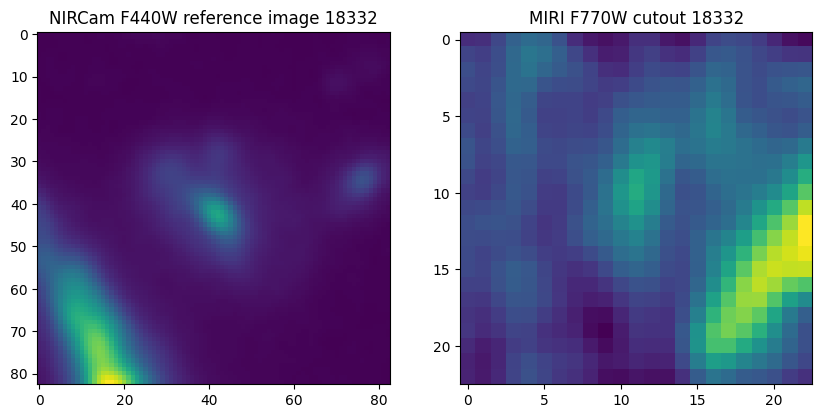

In [69]:

for i,g in enumerate(cat):

    cutout_side = 2.5*u.arcsec
    good_frac_cutout = 0.7
    smooth_sigma = 1.0
    
    """
    if g['source_id'] == 16424: # faint source, use bright source nearby
        cutout_side = 2.8*u.arcsec
        good_frac_cutout = 0.9
    if g['source_id'] == 7904: # exclude bright source nearby
        good_frac_cutout = 0.4
    if g['source_id'] == 11716: # exclude bright source nearby
        good_frac_cutout = 0.4
    if g['source_id'] == 21472: # fuzzy source, smooth more
        smooth_sigma=2.0
    """    
    
    print(g['id'])
    ref_position = SkyCoord(ra=g['ra'], dec=g['dec'], unit=u.deg)
    cutout_size = (cutout_side, cutout_side)

    # HANDLE miri DATA -----------------------------------------------------------------

    # extract cutout from the PRIMER cutouts I already made
    primer_F770W_cutout_name =  f"./cutouts/{g['id']}_F770W_cutout_primer.fits"
    #primer_F1800W_cutout_name = f"./cutouts/{g['source_id']}_F1800W_cutout_primer.fits"
    
    try:
        with fits.open(primer_F770W_cutout_name) as hdu_F770W:
            #hdu_F770W.info()
            F770W_data = hdu_F770W[1].data
            F770W_header = hdu_F770W[1].header
            F770W_wcs = WCS(F770W_header)
        #hdu_primer_F1800W = fits.open(primer_F770W_cutout_name)[0]
    except FileNotFoundError:
        print(f"No PRIMER cutout found for source {g['id']}. Skipping.")
        continue

    cutout_F770W = Cutout2D(F770W_data, ref_position, cutout_size, wcs=F770W_wcs)
    #cutout_hst.wcs.wcs.radesys = 'ICRS' # change to ICRS, which is the frame of the reference mosaic
    
    
    # HANDLE NIRCAM DATA ---------------------------------------------------------------
    
    # extract the cutouts from the NIRCam photometry
    nircam_frame = f'./NIRCam/F444W_cutouts/{g['id']}_F444W_cutout.fits'
    
    # Read in cutout for that specific galaxy from NIRCam
    with fits.open(nircam_frame) as hdu_nircam:
        #hdu_nircam.info()
        nircam_data = hdu_nircam[1].data
        nircam_header = hdu_nircam[1].header
        nircam_wcs = WCS(nircam_header)
        
    cutout_nircam = Cutout2D(nircam_data, ref_position, cutout_size, wcs=nircam_wcs)
    
    # CALCULATE THE OFFSETS OF THE CENTROIDS -------------------------------------------    
    
    # find centroid in NIRCam image
    fig, axs = plt.subplots(1,2, figsize=[10,5])
    cutout_nircam_smooth = scipy.ndimage.gaussian_filter(cutout_nircam.data, smooth_sigma)
    axs[0].imshow(cutout_nircam_smooth)
    ref_pix = cutout_nircam.wcs.world_to_pixel(ref_position)
    centroid_nircam_pix = centroids.centroid_quadratic(
        cutout_nircam_smooth, 
        xpeak=cutout_nircam.data.shape[0]//2, ypeak=cutout_nircam.data.shape[1]//2, 
        search_boxsize=int(np.floor(good_frac_cutout*cutout_nircam_smooth.shape[0])//2*2+1), fit_boxsize=5)
    centroid_nircam = cutout_nircam.wcs.pixel_to_world(centroid_nircam_pix[0], centroid_nircam_pix[1])
    axs[0].plot(centroid_nircam_pix[0], centroid_nircam_pix[1], 'x', color='red')
    nircam_title = f"NIRCam F440W reference image {g['id']}"
    axs[0].set(title=nircam_title)
    
    # find centroid in PRIMER cutouts
    cutout_F770W_smooth = scipy.ndimage.gaussian_filter(cutout_F770W.data, smooth_sigma)
    axs[1].imshow(cutout_F770W_smooth)
    ref_pix = cutout_F770W.wcs.world_to_pixel(ref_position)
    centroid_F770W_pix = centroids.centroid_quadratic(
        cutout_F770W_smooth, 
        xpeak=cutout_F770W.data.shape[0]//2, ypeak=cutout_F770W.data.shape[1]//2, 
        search_boxsize=int(np.floor(good_frac_cutout*cutout_F770W_smooth.shape[0])//2*2+1), fit_boxsize=5)
    centroid_F770W = cutout_F770W.wcs.pixel_to_world(centroid_F770W_pix[0], centroid_F770W_pix[1])
    axs[1].plot(centroid_F770W_pix[0], centroid_F770W_pix[1], 'o', color='orange')
    miri_title = f"MIRI F770W cutout {g['id']}"
    axs[1].set(title=miri_title)

    # show expected position of the centroid
    expected_position_pix = cutout_F770W.wcs.world_to_pixel(centroid_nircam)
    axs[1].plot(expected_position_pix[0], expected_position_pix[1], 'x', color='red')

    # if the fit does not find a centroid
    if np.isnan(centroid_nircam_pix).any() or np.isnan(centroid_F770W_pix).any():
        print("CENTROID NOT FOUND!")
        break
    
    # Create output directory
    output_dir = "./offsets/PRIMER_F770W/"
    os.makedirs(output_dir, exist_ok=True)

    figname = output_dir + f"{g['id']}_F770W_alignment_primer.pdf"
    fig.savefig(figname)
    plt.close()

    print(f'Successfully saved figure {figname} to {output_dir}!')
    
    # calculate offset and store in the catalog
    dra, ddec = centroid_nircam.spherical_offsets_to(centroid_F770W)
    print(dra.to(u.arcsec), ddec.to(u.arcsec))
    cat['primer_dra'][i] = dra.to(u.arcsec).value
    cat['primer_ddec'][i] = ddec.to(u.arcsec).value


In [70]:
cat

id,ra,dec,mag_F160W,SNR_F160W,completeness_F160W,use_phot,label,stellarity,UV,VJ,z_best,z_best_source,z_peak_phot,R50,lmass,emul_lmass,emul_zred,NRS_CLEAR,NRS_F110W,NRS_F140X,weight,REFERENCE,primer_dra,primer_ddec,cweb_dra,cweb_ddec
,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,arcsec
int64,float64,float64,float64,float64,float64,int64,bytes4,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64
16419,150.09560987849449,2.350068700469065,21.092844821334502,40.88595576743161,1.0,1,QSC,0,1.5600931447462194,0.9589469782630602,2.0868,3,2.0868,0.949068,11.29,11.462091290524182,2.102192906583932,22.250194448032374,21.5263829151584,20.86525345573673,53,0,0.19947676516902407,0.010967642336324903,0.0,0.0
16424,150.1101583934326,2.346669586114658,23.942241003234503,10.46421842226883,1.0,1,SF,0,0.9125312467430944,0.6995908342588574,0.4599,3,0.4599,0.764112,8.21,10.227400611555714,3.390518408445281,24.060133431399283,23.752517940131952,23.231808259805344,17,0,0.0,0.0,0.0,0.0
16474,150.11343833916197,2.3474745865071815,23.54920722966591,37.37214282206178,1.0,1,SF,0,0.41661710299546073,0.4586217877716759,2.8586,3,2.8586,0.188208,9.92,9.837901983027878,2.5244138771141094,29.94853130520459,28.989472895164567,26.399979067336737,3,0,0.0,0.0,0.0,0.0
16516,150.11533773478388,2.347698518052218,24.73644681741458,15.323874182904985,1.0,1,SF,0,0.956183089633238,0.5004374707212188,2.7193,3,2.7193,0.165294,9.72,9.835761227538331,2.728772481361164,25.978525777091853,25.275390491935315,24.779989106207516,3,1,0.0,0.0,0.0,0.0
16615,150.1037259277942,2.3485930147531473,25.266127222673877,10.506151860996347,0.9019715294903794,1,SF,0,0.5989253117247633,0.4559327905886963,2.1453,3,2.1453,0.41592,9.03,9.208214679793297,2.196671026524702,30.13508170545995,29.944658078618712,30.022548784153813,2,0,0.0,0.0,0.0,0.0
16874,150.09829123652534,2.3515716804864133,22.927171409180353,38.40011154680128,1.0,1,SF,0,0.9354502102606164,0.93082687649012,2.14559,2,2.1334,0.414534,10.46,10.447347060820114,2.1962415580994485,23.689105060053784,23.22689486541541,22.643152276805036,12,0,0.21368320882286274,0.01024791807630974,0.0,0.0
17000,150.11555120295176,2.3537070009366734,22.751865637630367,19.38883319477725,1.0,1,SF,0,0.7284146509415536,0.8099026649201231,3.3209,3,3.3209,0.691764,11.17,11.171878404405147,3.145280428133369,23.171728788303575,22.572846513906022,21.948568695022033,71,0,0.0,0.0,0.0,0.0
17517,150.09446324616317,2.3582214366916006,23.049672623837328,27.181412560947674,1.0,1,SF,0,0.468569178481335,0.12343353852290956,2.50608,2,2.5669,0.449778,9.92,10.057378950433352,2.515793668676154,27.106730625666682,25.97694340924399,25.458951909387572,5,0,0.0,0.0,0.0,0.0


In [71]:

# Open your NIRCam FITS file
with fits.open(nircam_frame) as hdu_nircam:
    #hdu_nircam.info()
    nircam_data = hdu_nircam[1].data
    nircam_header = hdu_nircam[1].header
    nircam_wcs = WCS(nircam_header)
    print("NIRCam Reference Frame:", nircam_header.get('RADESYS', 'Not Found'))
    print("NIRCam Equinox:", nircam_header.get('EQUINOX', 'Not Found'))

# Open your MIRI FITS file
primer_F770W_cutout_name =  f"./cutouts/16419_F770W_cutout_primer.fits"
with fits.open(primer_F770W_cutout_name) as hdu_F770W:
    #hdu_F770W.info()
    miri_data = hdu_F770W[1].data
    miri_header = hdu_F770W[1].header
    miri_wcs = WCS(F770W_header)
    print("MIRI Reference Frame:", miri_header.get('RADESYS', 'Not Found'))
    print("MIRI Equinox:", miri_header.get('EQUINOX', 'Not Found'))


NIRCam Reference Frame: ICRS
NIRCam Equinox: Not Found
MIRI Reference Frame: ICRS
MIRI Equinox: Not Found


Set OBSGEO-B to     7.544379 from OBSGEO-[XYZ].
Set OBSGEO-H to 1693944818.514 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -13.386215 from OBSGEO-[XYZ].
Set OBSGEO-H to 1411888769.318 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
